In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(21,321)]
i =0
result = np.zeros((3600))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        #plotvar = data.variables['SALT'][0,0:7,248:344,1100:1300]270:365,1100:1200
        plotvar = data.variables['SALT'][0,0:7,270:365,1100:1200]
        plotvar[plotvar < 0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[248:344,1100:1300]
        latt = latt[248:344,1100:1300]
        plotvar = plotvar
        
        aveplot = np.nanmean(plotvar,axis=0)
        aveplot = np.nanmean(aveplot,axis=0)
        aveplot = np.nanmean(aveplot,axis=0)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [4]:
ww2 = np.convolve(result, np.ones((60,))/60, mode='valid')

Text(0.5, 1.0, 'Sea Surface Salinity (Top 70m, averaged over 0$^\\circ$ - 20$^\\circ$E, 64$^\\circ$S - 68$^\\circ$S)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


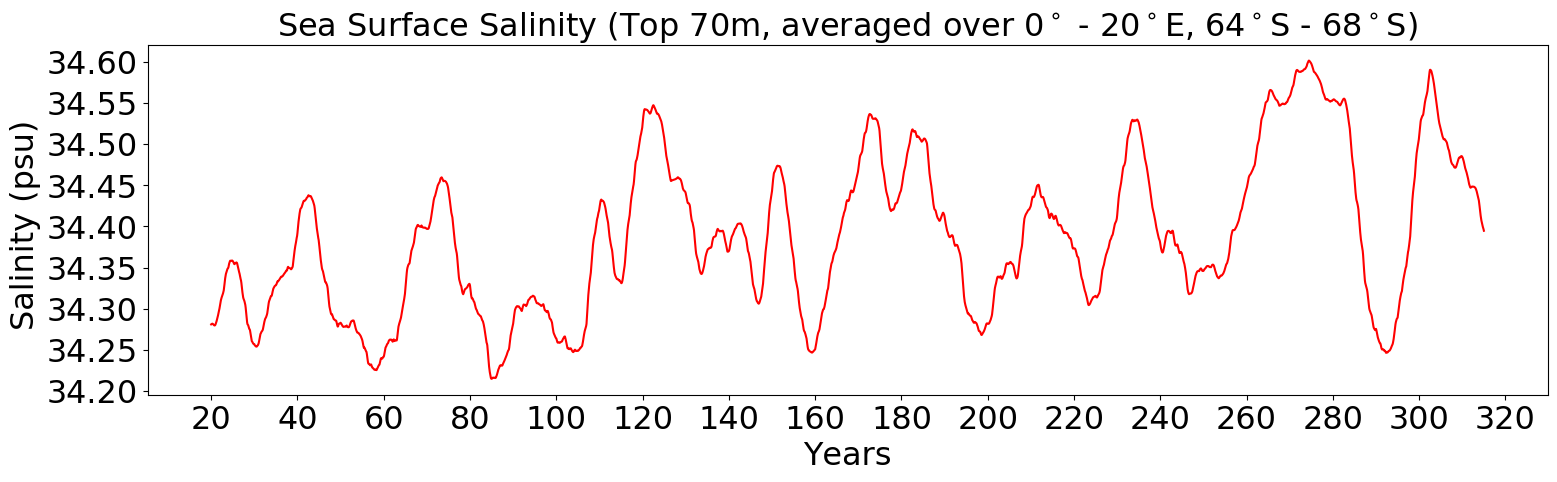

In [5]:

my_font = {'fontname':'Cambria', 'size':'23'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.7, 0.7])
ax0.plot(ww2,'r')
plt.xticks(range(0,3720,240), ['20', '40', '60', '80','100','120','140','160',\
                            '180','200','220', '240', '260','280','300','320'],**my_font)

plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Salinity (psu) ',**my_font)
##################################################################################################


ax0.set_title('Sea Surface Salinity (Top 70m, averaged over 0$^\circ$ - 20$^\circ$E, 64$^\circ$S - 68$^\circ$S)',**my_font)
